In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn import decomposition
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import decomposition
from sklearn import svm 
import tensorflow as tf
import seaborn as sn
from sklearn.metrics import confusion_matrix
from keras import callbacks
%matplotlib inline

In [2]:
import keras

In [3]:
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Dense
import os

In [5]:
import pickle
from numpy.random import seed
seed(1)

from tensorflow.keras.optimizers import Adam
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [6]:
import keras 
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D
from keras import models
from keras.models import Model


In this report I will try to classify German Traffic Signs

In [7]:
data = []
labels = []
classes = 43 
cur_path = os.getcwd()

Loaded in the data 

In [9]:
for i in range(classes):
    path = os.path.join(cur_path,'archive/train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [10]:
test_y_test = pd.read_csv('archive/Test.csv')
test_labels = test_y_test["ClassId"].values
test_imgs = test_y_test["Path"].values

In [11]:
testlabels = []
datatest = []

for img in test_imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    datatest.append(np.array(image))
test_X_test=np.array(datatest)

The images are 30 x 30 x 3, there are 43 types of traffic signs

In [33]:
np.shape(image)


(30, 30, 3)

In [34]:
image = np.array(image)

In [35]:
classes

43

Plots of the different traffic signs.

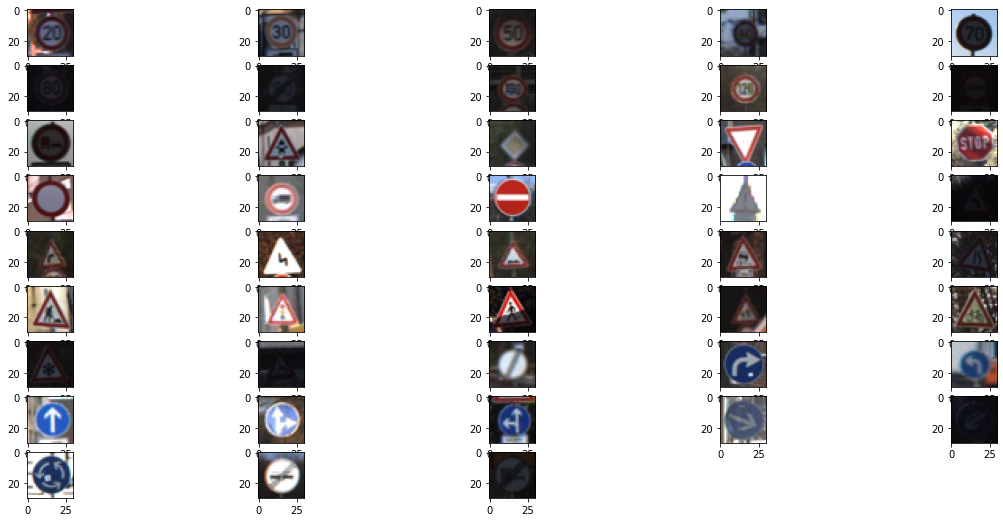

In [36]:
fig = plt.figure(figsize=(20,10))
j = -1
for i in range(0,43):
    ax = fig.add_subplot(10,5,i+1)
    while  test_labels[j] != i:
        j+=1
    if test_labels[j] == i:
        plt.imshow(  test_X_test[j])
    
    



    
    


Trying to run a clustering algorithm on the model. I flattened the data into a 2700 (30 x 30 x 3) columns.

In [75]:
trdata = np.array(data)

trdata2 = []
for a in data:
    trdata2.append(a.flatten())

In [79]:
fltest = np.array(test_X_test)
fltest2 = []
for a in fltest:
    fltest2.append(a.flatten())

In [97]:
np.shape(fltest2)

(12630, 2700)

In [40]:
kMeans = KMeans(n_clusters = 43, random_state = 20
kMeans = kMeans.fit(trdata2)
centroids_seg = kMeans.cluster_centers_



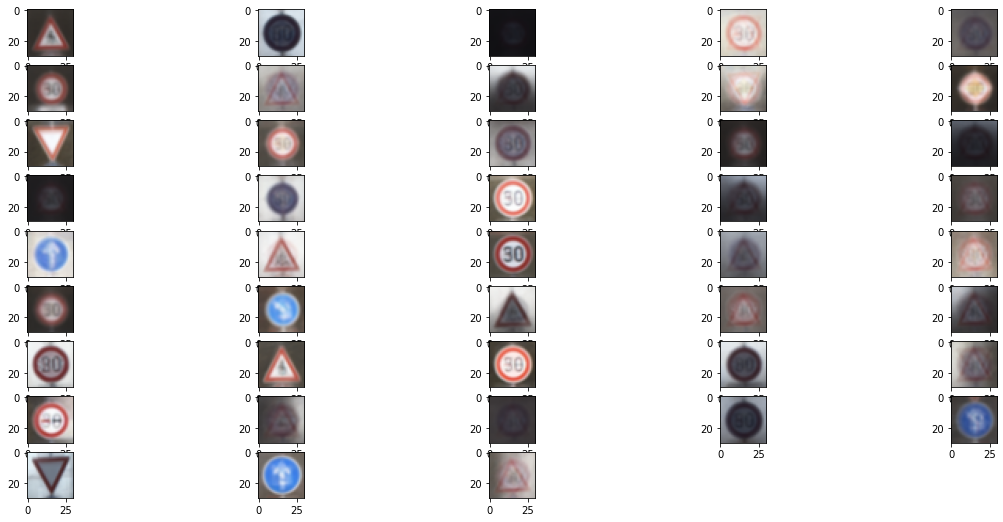

In [43]:
fig = plt.figure(figsize=(20,10))
for i in range(0,43):
    ax = fig.add_subplot(10,5,i+1)
    plt.imshow(np.around( centroids_seg[i].reshape(30,30,3),0).astype('uint8'))
    


In [44]:
cs_km = completeness_score(labels, kMeans.labels_)
hs_km = homogeneity_score(labels, kMeans.labels_)

print('Completeness of Clusters: '+  str(cs_km))
print('Homogeneity of Clusters: '+ str(hs_km))

Completeness of Clusters: 0.18412809991700435
Homogeneity of Clusters: 0.1762087781958938


The scores aren't very high, at around 0.184 for completeness and 0.176 for homogeneity. Looking at the centroid plots, it looks like the clustering process doesn't cluster the 43 traffic signs correctly at all. There's a lot of plots that show the 30 sign.

Since the data had a lot of different columns, I also did principal component analysis on the data in order to reduce dimensionality

In [122]:
pca = decomposition.PCA(n_components=100, random_state = 20)
pca_fit = pca.fit(trdata2).transform(trdata2)
ratios = pca.explained_variance_ratio_
totals = []
total = 0
for i in range(len(ratios)):
    total += ratios[i]
    totals.append(total)

Text(0, 0.5, 'Percent Captured Variance (total)')

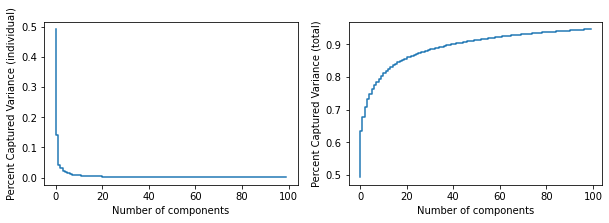

In [46]:
fig = plt.figure(figsize=(10,3))
ax1 = plt.subplot(121)
  

ax1.step(range(0,100), ratios, alpha = 1)
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Percent Captured Variance (individual)')

ax2 = plt.subplot(122)
ax2.step(range(0,100), totals, alpha = 1)
ax2.set_xlabel('Number of components')
ax2.set_ylabel('Percent Captured Variance (total)')

For the scree plot, it looks like there is a knee at around 10 or so components, I'll use 20 components to capture more variance

In [123]:
pcaless = decomposition.PCA(n_components = 20, random_state = 20)
pca_lessfit = pcaless.fit(trdata2).transform(trdata2)

km_pca = KMeans(n_clusters = 43, random_state = 20)
km_pca_fit = km_pca.fit(pca_lessfit)
centers_pca = km_pca_fit.cluster_centers_
labels_pca = km_pca_fit.labels_
preds_pca = km_pca_fit.predict(pca_lessfit)



cs_pca = completeness_score(labels, preds_pca)
hs_pca = homogeneity_score(labels,preds_pca)

print ('The completeness of 20 components :', cs_pca)
print ('The homogeneity of  20 components :', hs_pca)


The completeness of 20 components : 0.17769077623457222
The homogeneity of  20 components : 0.17465588690559108


In [60]:
pca_x_train, pca_x_test, y_train, y_test = train_test_split(pca_lessfit, labels, test_size=0.2, random_state=20)

In [65]:
df_x_train, df_x_test, y_train, y_test = train_test_split(trdata2, labels, test_size=0.2, random_state=20)

In [51]:
np.random.RandomState(1)
param_grid = {'C': [1, 5, 10],
              'gamma': [0.000001, 0.0001, 0.001, 0.01]}

grid_scv = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=3)

grid_scv.fit(pca_x_train, y_train)
print(grid_scv.best_params_)

{'C': 10, 'gamma': 1e-06}


In [52]:
svc_model = grid_scv.best_estimator_

svc_yfit = svc_model.predict(pca_x_train)

print("Classification report for training set SVC with 20 PCA components:")
print(classification_report(y_train, svc_yfit))

svc_yfit = svc_model.predict(pca_x_test)

print("Classification report for testing set SVC with 20 PCA components:")
print(classification_report(y_test, svc_yfit))



Classification report for training set SVC with 20 PCA components:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00      1745
           2       0.99      0.98      0.99      1796
           3       0.95      0.95      0.95      1139
           4       0.95      0.95      0.95      1595
           5       0.97      0.94      0.96      1469
           6       1.00      1.00      1.00       329
           7       0.97      0.94      0.96      1115
           8       0.91      0.94      0.92      1109
           9       0.99      0.97      0.98      1181
          10       0.93      0.97      0.95      1623
          11       1.00      1.00      1.00      1053
          12       1.00      1.00      1.00      1663
          13       1.00      1.00      1.00      1747
          14       1.00      1.00      1.00       626
          15       1.00      1.00      1.00       507
          16  

I ran the best SVC model on the on the dataset with 20 PCA components using the parameters I got from gridsearch

I got 98% correct on the training dataset. 

For the testing set, I got a 0.91 for precision, 90 recall, and 91 F1 score. So the KNN models for the dataset with 18 PCA components has pretty good accuracy accuracy.

In [24]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=20)

After this, I will use a convolutional neural network model to get higher accuracy. 

In [42]:
datagen = ImageDataGenerator(
brightness_range=[0.2,1.1],
rescale=1./255,
        width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=20,

    

)

datagen.fit(X_train)



I did image preprocessing before fitting the model. I decided to scale the data between 0 and 1 by dividing everything by 255, Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. Also, seeing the some of the misclassified data from earlier neural network models, I decided to randomly brighten, darken, and shift some of the images by a little bit so the model could classify on the training data better. 


In [26]:
y_val2 = keras.utils.to_categorical(y_val)
y_train2 = keras.utils.to_categorical(y_train)
X_val_norm = np.array(X_val)/255
test_X_test_norm = test_X_test/255
X_train = np.array(X_train)
X_val = np.array(X_val)

I implemented a convolutional neural network model with four convolutional layers. I first did two convolutional layers before max pooling, and I did the same thing again for the other two convolutional layers. The reasoning is more convolutions before reducing the size of the feature maps with the pooling can lead to more interesting representations of the data. The filters for the first two convolutional layers are supposed to detect the outside features such as the background and the shape. The filters for the second convolutional layer are supposed to detect the inside features such as the color and sign. 

After the covolutional layers, I added a single hidden layer with 512 neurons and added a drop rate of 0.3. I used an adam optimizer, which is a way of using past gradients to calculate current gradients, because Adam is computationally efficient and has very little memory requirement. I also set up a decay rate, which seek to adjust the learning rate during training by reducing the learning rate, based upon the learning rate and number of epochs. 


In [40]:
model3 = keras.models.Sequential([    
    keras.layers.Conv2D(filters=20, kernel_size=(3,3), activation='relu', input_shape=(30,30,3)),
    keras.layers.Conv2D(filters=40, kernel_size=(3,3), activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=80, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=160, kernel_size=(3,3), activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(rate=0.3),
    
    keras.layers.Dense(43, activation='softmax')
])


lr = 0.001
epochs = 25

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



From my previous experience of running the model, sometimes the model would start overfitting the data as the number of epochs increased, where the validation loss on the validated data would increase as more epochs are ran. So I implemented early stopping on the data to prevent my model from being overfitted. 

In [46]:

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 7, 
                                        restore_best_weights = True)

model3.fit(datagen.flow(X_train, y_train3, batch_size=64), epochs = 25, validation_data=(X_val_norm, y_val2),   callbacks = [earlystopping])
    
    

Epoch 1/25
491/491 [==============================] - 71s 143ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.0040 - val_accuracy: 0.9989
Epoch 2/25
491/491 [==============================] - 76s 155ms/step - loss: 0.0067 - accuracy: 0.9983 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 3/25
491/491 [==============================] - 74s 150ms/step - loss: 0.0099 - accuracy: 0.9974 - val_loss: 0.0180 - val_accuracy: 0.9952
Epoch 4/25
491/491 [==============================] - 74s 151ms/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 5/25
491/491 [==============================] - 74s 151ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0054 - val_accuracy: 0.9989
Epoch 6/25
491/491 [==============================] - 77s 156ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.0064 - val_accuracy: 0.9981
Epoch 7/25
491/491 [==============================] - 92s 188ms/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 0.0031 - val_ac

In [47]:
pred_norm = np.argmax(model3.predict(test_X_test_norm), axis=-1)


print(classification_report(test_labels, pred_norm ))
print(accuracy_score(test_labels, pred_norm ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      1.00      0.99       720
           2       1.00      0.99      1.00       750
           3       1.00      0.98      0.99       450
           4       1.00      0.99      0.99       660
           5       0.98      1.00      0.99       630
           6       0.99      0.99      0.99       150
           7       1.00      0.99      1.00       450
           8       1.00      1.00      1.00       450
           9       0.99      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.99      1.00      0.99       420
          12       1.00      0.98      0.99       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       1.00      1.00      1.00       210
          16       0.97      1.00      0.99       150
          17       1.00    

The accuracy of the neural network model model was significantly better than that of the SVC model at 99%. One issue I noticed was that there are some traffic signs that are alot more common than others. The more comming traffic signs have very high accuracy, but the less commong traffic signs have lower accuracy.  

In [52]:
model3.save('cnnhighest.h5')

    
model3.save_weights('cnnhighestweights.h5')

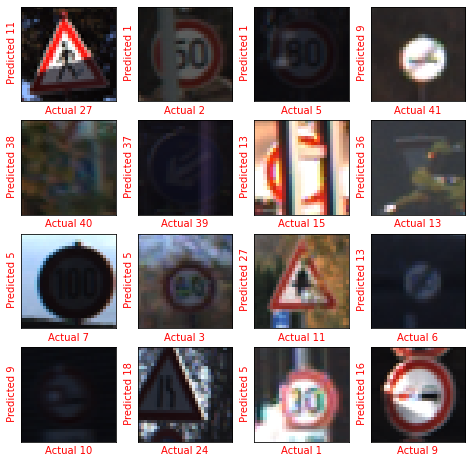

In [85]:
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
k = 0
wrongpreds =[]
for i, axi in enumerate(ax.flat):
    for j in range(0, len(test_labels)):
        if pred_norm[j] != test_labels[j] and test_labels[j] not in wrongpreds:
            #print(test_labels[j])
            wrongpreds.append(test_labels[j])
            axi.imshow(test_X_test[j])
            axi.set(xticks=[], yticks=[])
            axi.set_ylabel(" Predicted " + str(pred_norm[j]),
                           color='red')
            axi.set_xlabel("Actual " + str(test_labels[j]),
                          color='red')
            k+=1
            if k >= 8:
                break

These are some plots of misclassified images. Some of the images are quite dark and are hard to see or classified. Some are also shifted or and out of focus, or simply hard to see due to being covered up by plants.

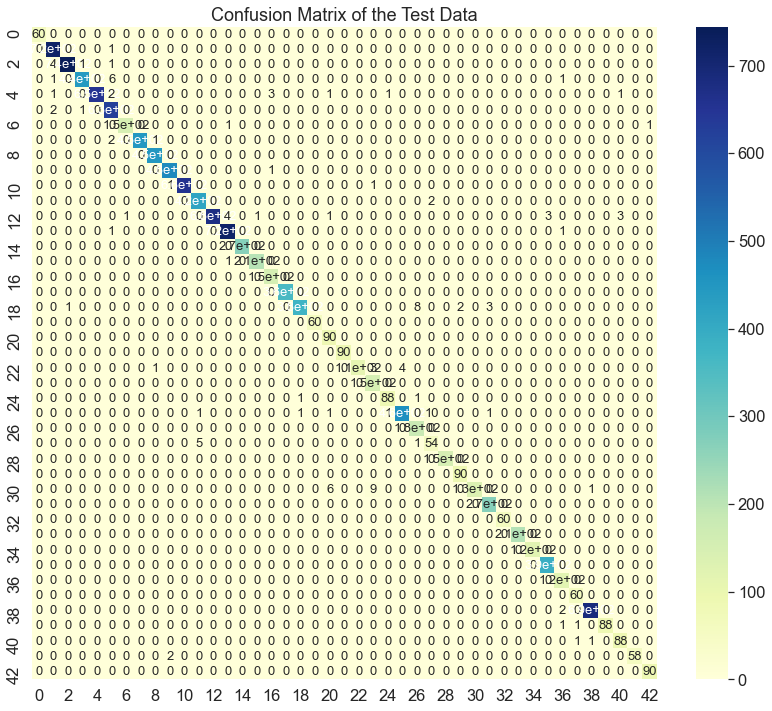

In [185]:
cmm_test = confusion_matrix(test_labels, pred_norm)
cmmdf_test = pd.DataFrame(cmm_test, range(43), range(43))
fig = plt.figure(figsize = (14,12))
sn.set(font_scale=1.5) # for label size
sn.heatmap(cmmdf_test, annot=True, annot_kws={"size": 13}, cmap="YlGnBu") # font size
plt.title('Confusion Matrix of the Test Data')
plt.show()



Visualizing Filters

In [91]:
# The dimensions of our input image
img_width = 30
img_height = 30
# Our target layer: we will visualize the filters from this layer.
# See `model.summary()` for list of layer names, if you want to change this.
layer_name = "conv2d_12"


In [92]:
# using the best cnn model 
model = model3

# Set up a model that returns the activation values for our target layer
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.inputs, outputs=layer.output)

In [90]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 20)        560       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 40)        7240      
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 40)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 40)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 80)        28880     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 160)         115360    
_________________________________________________________________
batch_normalization_7 (Batch (None, 9, 9, 160)        

In [182]:
img_width = 30
img_height = 30
# Our target layer: we will visualize the filters from this layer.
# See `model.summary()` for list of layer names, if you want to change this.
layer_name = "conv2d_12"

model = model3

# Set up a model that returns the activation values for our target layer
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.inputs, outputs=layer.output)

def compute_loss(input_image, filter_index):
    activation = feature_extractor(input_image)
    # We avoid border artifacts by only involving non-border pixels in the loss.
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)
@tf.function
def gradient_ascent_step(img, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = compute_loss(img, filter_index)
    # Compute gradients.
    grads = tape.gradient(loss, img)
    # Normalize gradients.
    grads = tf.math.l2_normalize(grads)
    img += learning_rate * grads
    return loss, img



def initialize_image():
    # We start from a gray image with some random noise
    img = imagefilt
    # ResNet50V2 expects inputs in the range [-1, +1].
    # Here we scale our random inputs to [-0.125, +0.125]
    return (img - 0.5) * 0.25


def visualize_filter(filter_index):
    # We run gradient ascent for 20 steps
    iterations = 30
    learning_rate = 10.0
    img = initialize_image()
    for iteration in range(iterations):
        loss, img = gradient_ascent_step(img, filter_index, learning_rate)

    # Decode the resulting input image
    img = deprocess_image(img[0].numpy())
    return loss, img


def deprocess_image(img):
    # Normalize array: center on 0., ensure variance is 0.15
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.15

    # Center crop
    img = img[3:-3, 3:-3, :]

    # Clip to [0, 1]
    img += 0.5
    img = np.clip(img, 0, 1)

    # Convert to RGB array
    img *= 255
    img = np.clip(img, 0, 255).astype("uint8")
    return img


loss, img = visualize_filter(0)
keras.preprocessing.image.save_img("0.png", img)
display(Image("0.png"))


Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15


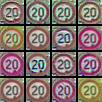

In [184]:
# Compute image inputs that maximize per-filter activations
# for the first 16 filters of our target layer
all_imgs = []
for filter_index in range(16):
    print("Processing filter %d" % (filter_index,))
    loss, img = visualize_filter(filter_index)
    all_imgs.append(img)

# Build a black picture with enough space for
# our 3 x 3 filters of size 24*24, with a 2px margin in between
margin = 2
n = 4
cropped_width = img_width - 3 * 2
cropped_height = img_height - 3 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

# Fill the picture with our saved filters
for i in range(n):
    for j in range(n):
        img = all_imgs[i * n + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j
            + cropped_height,
            :,
        ] = img
keras.preprocessing.image.save_img("stiched_filters.png", stitched_filters)

from IPython.display import Image, display

display(Image("stiched_filters.png"))


Looking at the filters of the first convolutional layer. Looks like it does a filter based color. 

In conclusion, the convolutional neural network is the best for classifying the data. I could try to modify the CNN more to get a higher accuracy. I could add a second hidden layer, adjust the decay and learning rate, change the dropout rate, and add more parameters to the image preprocessor. I could also try to use other neural network models, like the inception model